# Titanic Data Analysis

## Background

This is the second project of Data Analyst Nanodegree. The purpose is to conduct data analysis on Titanic dataset by using Pandas and Numpy.

**Titanic Data**: Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. The description of the dataset can be found on [the Kaggle website](https://www.kaggle.com/c/titanic/data). 

## Questions

1. What is the relation between sex and survival rate?
+ What is the relation between socio-economic status and survival rate?
+ What is the relation between age and survival rate?

### Limitations

1. SibSp: From this column, we can only know how many siblings and spouse the passenger has on board. We do not know if two passengers are husband and wife, or two passengers are silings. And we do not know "family" information based on the given data. With more details of sibling and spouse information, we may investigate the relation between family and suvival rate.

+ Parch: We cannot tell if a passenger is parent or child. For example, if a woman is 20 years old, it is possible she is a mom with a young child or she is a child of a middle age woman. If we are provided with the parent and child information, we can answer questions like "if women with children have larger survival rate than women without children".

+ Cabin: We do not know the location of each cabin. Therefore, we cannot tell if passengers from some cabin has larger survival rate than passengers from other cabins. We cannot use Cabin information without map information.

Due to the limitations above, we choose to propose questions unrelated with SibSp, Parch and cabin information.


## Data Wrangling

### Variable Description

According to [the Kaggle website](https://www.kaggle.com/c/titanic/data), the variables are described below,

+ **survival**        Survival (0 = No; 1 = Yes)
+ **pclass**          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
+ **name**            Name
+ **sex**             Sex
+ **age**             Age
+ **sibsp**           Number of Siblings/Spouses Aboard
+ **parch**           Number of Parents/Children Aboard
+ **ticket**          Ticket Number
+ **fare**            Passenger Fare
+ **cabin**           Cabin
+ **embarked**        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
                
                
**SPECIAL NOTES:**

+ Pclass is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
+ Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

+ Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
+ Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
+ Parent:   Mother or Father of Passenger Aboard Titanic
+ Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

In [2]:
%pylab inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

titanic_data = pd.read_csv('titanic-data.csv')

# Print the first few rows of the dataset
titanic_data.head()

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check total number of rows
len(titanic_data.index)

891

In [5]:
# Check missing values in rows
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Check duplicate rows
titanic_data.duplicated().sum()

0

As we can see, there is no duplicate row in the dataset, but the dataset contains missing values. Also, in order to answer the questions above, several columns can be removed since we don't need those information to conduct the analysis. 

Next steps:
1. Remove unwanted columns
+ Fix missing values

### Remove Unwanted Columns

The following columns can be removed:
* Name
* Ticket
* Fare
* Cabin
* Embarked
* SibSp
* Parch

In [112]:
# Remove unwanted columns
titanic_data_cleaned = titanic_data.drop(['Name', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'SibSp', 'Parch'], 1)

# Show the first few rows of the cleaned dataset
titanic_data_cleaned.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


### Fix Missing Values

Since Cabin and Embarked columns have been removed, we only need to fix missing values in Age column. We cannot simply fix missing values in Age column by replacing those numbers. Therefore, we will record rows with missing Age values and take these values into account when we conduct the analysis.

We would like to record:
* Total number of rows with missing Age values
* Number of females with missing Age values 
* Number of males with missing Age values

In [113]:
# Total number of rows with missing Age values
titanic_data_null_ages = titanic_data_cleaned[titanic_data_cleaned['Age'].isnull()]
print len(titanic_data_null_ages)

# Dataset with no null age values
titanic_data_no_null_ages = titanic_data_cleaned[titanic_data_cleaned['Age'].notnull()]
print len(titanic_data_no_null_ages)

177
714


In [114]:
# Number of females with missing Age values
titanic_data_null_ages_female = titanic_data_null_ages.loc[titanic_data_null_ages['Sex'] == 'female']

print len(titanic_data_null_ages_female)

53


In [115]:
# Number of males with missing Age values
titanic_data_null_ages_male = titanic_data_null_ages.loc[titanic_data_null_ages['Sex'] == 'male']

print len(titanic_data_null_ages_male)

124


In summary, 
* Total number of rows with missing Age values: 177 (titanic_data_null_ages)
* Number of females with missing Age values: 53 (titanic_data_null_ages_female)
* Number of males with missing Age values: 124 (titanic_data_null_age_male)

In addition,
* Number of rows with no missing Age values: 714 (titanic_data_no_null_ages)


## Explore and Visualization

### Question 1: Sex vs. Survival Rate

In [116]:
# Number of males and females
male_number = len(titanic_data_cleaned.loc[titanic_data_cleaned['Sex'] == 'male'])
female_number = len(titanic_data_cleaned.loc[titanic_data_cleaned['Sex'] == 'female'])

# Number of males and females who are survived
male_survived_number = len(titanic_data_cleaned.loc[(titanic_data_cleaned['Sex'] == 'male') & 
                                                   (titanic_data_cleaned['Survived'] == 1)])
female_survived_number = len(titanic_data_cleaned.loc[(titanic_data_cleaned['Sex'] == 'female') & 
                                                   (titanic_data_cleaned['Survived'] == 1)])

print 'Number of male: {}'.format(male_number)
print 'Number of female: {}'.format(female_number)
print 'Number of survived male: {}'.format(male_survived_number)
print 'Number of survived female: {}'.format(female_survived_number)
print 'Survival rate of male: {}%'.format(round(float(male_survived_number)/male_number*100, 2))
print 'Survival rate of female: {}%'.format(round(float(female_survived_number)/female_number*100, 2))

Number of male: 577
Number of female: 314
Number of survived male: 109
Number of survived female: 233
Survival rate of male: 18.89%
Survival rate of female: 74.2%


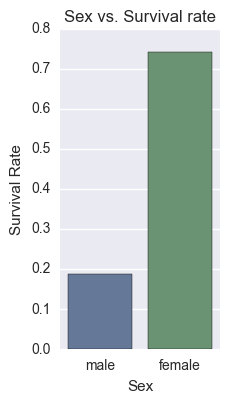

In [160]:
# Plot survival rate of males and females
g = sns.factorplot(x="Sex", y="Survived", data=titanic_data_cleaned, saturation=.5, kind="bar", ci=None, aspect=.6)
g.set_axis_labels('Sex', 'Survival Rate')
g.axes.flat[0].set_title('Sex vs. Survival rate')

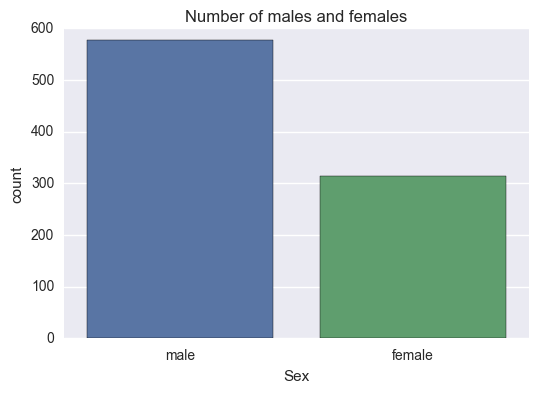

In [166]:
# Plot number of male and female
ax = sns.countplot(x="Sex", data=titanic_data_cleaned)
ax.set_title('Number of males and females')

According to the analysis above, females have much higher survival rate than males.


### Question 2: Socio-economic Status vs. Survival Rate

In [119]:
# function to compute survival rate
def get_survival_rate(sex, pclass):
    total_number = len(titanic_data_cleaned.loc[(titanic_data_cleaned['Sex'] == sex) & 
                                                   (titanic_data_cleaned['Pclass'] == pclass)])
    survived_number = len(titanic_data_cleaned.loc[(titanic_data_cleaned['Sex'] == sex) & 
                                                           (titanic_data_cleaned['Pclass'] == pclass) &
                                                           titanic_data_cleaned['Survived'] == 1])
    survival_rate = round(float(survived_number)/total_number*100, 2)
    return survival_rate

print 'Survival of males of different classes: \n\
       class 1: {}%, class 2: {}%, class 3: {}%'.format(get_survival_rate('male', 1),
                                                       get_survival_rate('male', 2),
                                                       get_survival_rate('male', 3),)
print 'Survival of females of different classes: \n\
       class 1: {}%, class 2: {}%, class 3: {}%'.format(get_survival_rate('female', 1),
                                                       get_survival_rate('female', 2),
                                                       get_survival_rate('female', 3),)


Survival of males of different classes: 
       class 1: 36.89%, class 2: 15.74%, class 3: 13.54%
Survival of females of different classes: 
       class 1: 96.81%, class 2: 92.11%, class 3: 50.0%


As we can see, in general, females have much higher survival rate than males. Males of 1st class have higher survival rate than males of other classes. For females, both 1st class and 2nd class have survival rates larger than 90%. However, females of class 3 have only 50% survival rate which is much lower than the other classes.

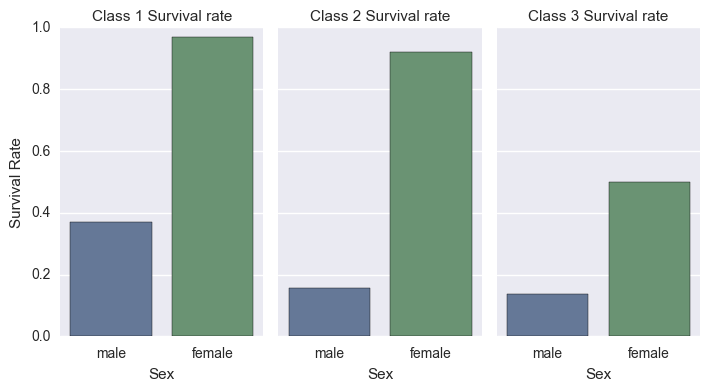

In [176]:
# Plot the survival rate of males and females of different classes
g = sns.factorplot(x="Sex", y="Survived", col="Pclass", data=titanic_data_cleaned, 
                   saturation=.5, kind="bar", ci=None, aspect=.6)
g.set_axis_labels('Sex', 'Survival Rate').set_titles("Class {col_name} Survival rate")


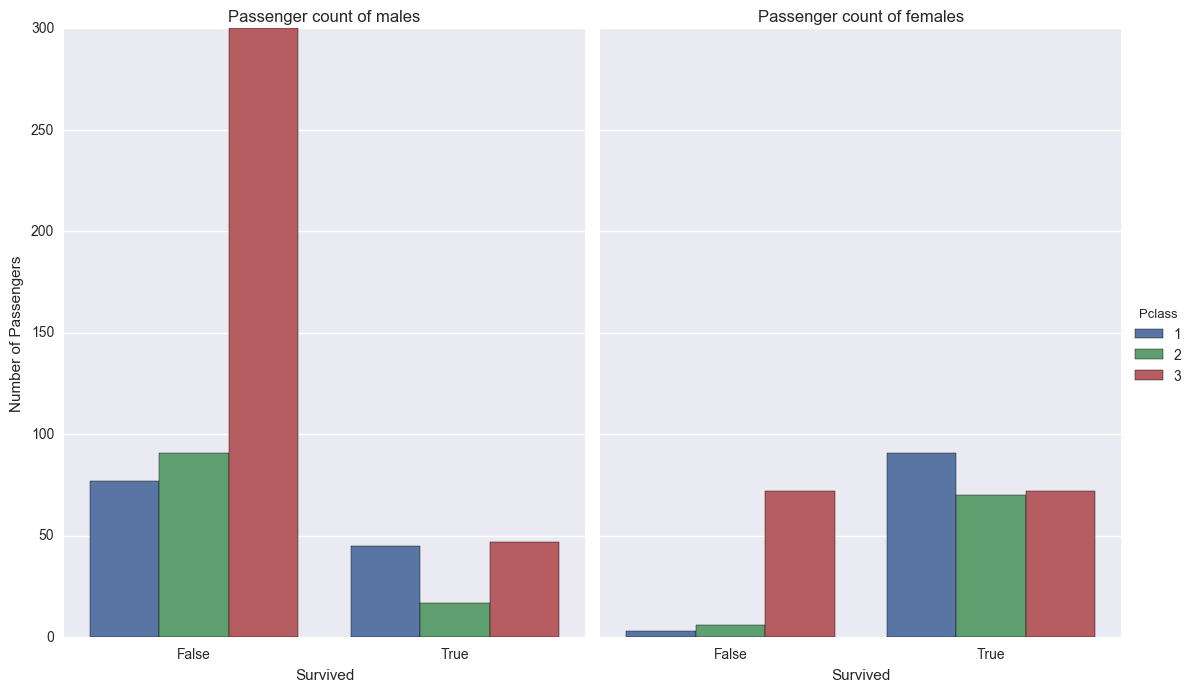

In [177]:
# Plot the number of survived and unsurvived males and females of different classes
g = sns.factorplot('Survived', col='Sex', hue='Pclass', data=titanic_data_cleaned, kind='count', size=7, aspect=.8)

# Set up axis and labels
g.set_xticklabels(["False", "True"]).set_axis_labels('Survived', 'Number of Passengers')
titles = ['Passenger count of males', 'Passenger count of females']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

### Question 3: Age vs. Survival Rate

As we discussed above, we use the new dataset (titanic_data_no_null_ages) without null age values in this case. 

In [122]:
# Check the min and max age value
print titanic_data_no_null_ages['Age'].min()
print titanic_data_no_null_ages['Age'].max()

0.42
80.0


The age ranges from 0.42 to 80 years old. The analysis is based on age groups which are defined below,

* 0 < age <= 10 
* 10 < age <= 20
* 20 < age <= 30
* 30 < age <= 40
* 40 < age <= 50
* 50 < age <= 60
* 60 < age <= 70
* 70 < age <= 80

Note: We assume children are people with age < 18

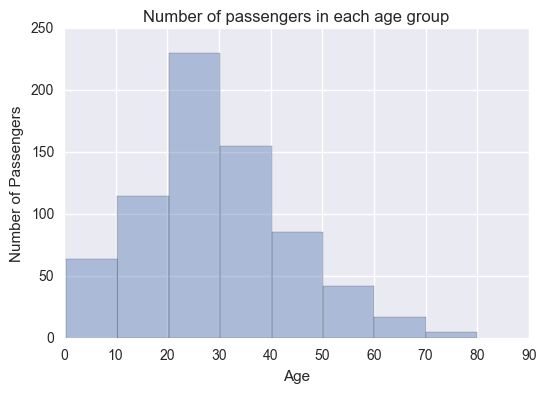

In [168]:
ax = sns.distplot(titanic_data_no_null_ages['Age'], bins=8, kde=False, axlabel='Age')
ax.set_ylabel('Number of Passengers')
ax.set_title('Number of passengers in each age group')

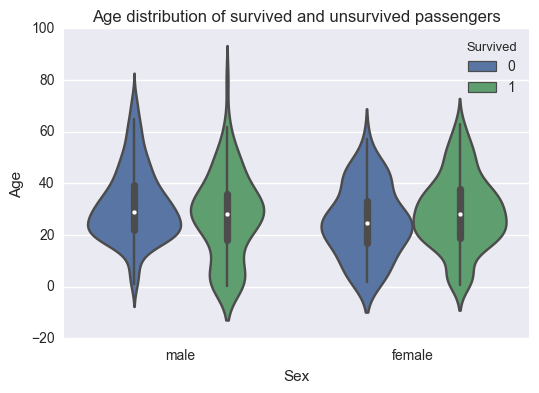

In [188]:
ax = sns.violinplot(x='Sex', y='Age', hue='Survived', data=titanic_data_no_null_ages)
ax.set_title('Age distribution of survived and unsurvived passengers')

From the graph above, we can see that age is not a dominant factor in survival rate. Both males and females have similar age distribution in regard to survival rate.

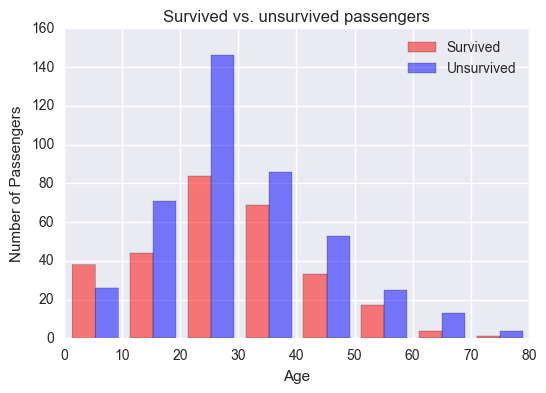

In [169]:
survived = titanic_data_no_null_ages.loc[titanic_data_no_null_ages['Survived'] == 1]
unsurvived = titanic_data_no_null_ages.loc[titanic_data_no_null_ages['Survived'] == 0]

plt.hist([survived['Age'], unsurvived['Age']], color=['r','b'], bins=8, alpha=0.5, label=['Survived', 'Unsurvived'])
plt.legend(loc='upper right')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Survived vs. unsurvived passengers')

In [125]:
# Compute survial rate for x < ages <=y  (x < y)
def get_age_survival_rate(x, y):
    total_number_age_group = len(titanic_data_no_null_ages.loc[(titanic_data_no_null_ages['Age'] > x) & 
                                                              (titanic_data_no_null_ages['Age'] <= y)])
    survival_age_group = len(titanic_data_no_null_ages.loc[(titanic_data_no_null_ages['Age'] > x) & 
                                                          (titanic_data_no_null_ages['Age'] <= y) &
                                                          (titanic_data_no_null_ages['Survived'] == 1)])
    return round(float(survival_age_group)/total_number_age_group*100, 2)

print 'Survival rate for each age group: \n\
        0 < age <= 10: {}% \n\
        10 < age <= 20: {}% \n\
        20 < age <= 30: {}% \n\
        30 < age <= 40: {}% \n\
        40 < age <= 50: {}% \n\
        50 < age <= 60: {}% \n\
        60 < age <= 70: {}% \n\
        70 < age <= 80: {}%'.format(get_age_survival_rate(0, 10),
                                   get_age_survival_rate(10, 20),
                                   get_age_survival_rate(20, 30),
                                   get_age_survival_rate(30, 40),
                                   get_age_survival_rate(40, 50),
                                   get_age_survival_rate(50, 60),
                                   get_age_survival_rate(60, 70),
                                   get_age_survival_rate(70, 80))

Survival rate for each age group: 
        0 < age <= 10: 59.38% 
        10 < age <= 20: 38.26% 
        20 < age <= 30: 36.52% 
        30 < age <= 40: 44.52% 
        40 < age <= 50: 38.37% 
        50 < age <= 60: 40.48% 
        60 < age <= 70: 23.53% 
        70 < age <= 80: 20.0%


Based on the analysis above, young children (age from 0 to 10) have near 60% survival rate which is the highest of all the other age groups. Older people (age above 60) have relatively lower survival rate, both around 20%. The other age groups have survival rate around 40%. 

Next, we analyze the survival rate of children and adults.

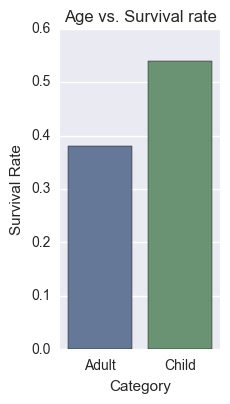

In [170]:
# Add Category column to classify people into child and adult
titanic_data_no_null_ages.loc[(titanic_data_no_null_ages['Age'] < 18),'Category'] = 'Child'
titanic_data_no_null_ages.loc[(titanic_data_no_null_ages['Age'] >= 18),'Category'] = 'Adult'

g = sns.factorplot(x='Category', y='Survived', data=titanic_data_no_null_ages, saturation=.5, kind="bar", ci=None, aspect=.6)
g.set_axis_labels('Category', 'Survival Rate')
g.axes.flat[0].set_title('Age vs. Survival rate')

In [127]:
grouped = titanic_data_no_null_ages.groupby(['Category'])

def get_category_survival_rate(category):
    survival_rate = round(float(grouped.get_group(category)['Survived'].sum()) / len(grouped.get_group(category))*100, 2)
    return survival_rate

print 'Survival rate for children and adults: \n\
       children: {}% \n\
       adults: {}%'.format(get_category_survival_rate('Child'), get_category_survival_rate('Adult'))

Survival rate for children and adults: 
       children: 53.98% 
       adults: 38.1%


As we can see that children have 15% higher survival rate than adults. 

### Limitations

The dataset contains 177 rows of missing age values, which is roughly 20% of the whole dataset. The relation between age and survival rate is built on dataset without missing age values and may be inaccurate due to these missing values. 

However, Q1 and Q2 do not depend on age values, the analysis of them is based on the whole given dataset. 

## Conclution

In summary, women in 1st class have highest suvival rate and men in 3rd class have lowest survival rate. In general, women and children have higher survival rate. Both sex and class are major factors in survival rate. As for age, young children have higher survival rate than other age groups. Older adults have relatively low survival rates. And the other age groups' survival rates are similar. 